In [2]:
import pandas as pd

df = pd.read_excel("https://docs.google.com/spreadsheets/d/152JyksagijqyscnrFDc6Ez2VjT5MKNXpDOyc4PRlauw/export?format=xlsx", sheet_name="Маркетинговые данные")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66162 entries, 0 to 66161
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 66162 non-null  object 
 1   Domain                    66162 non-null  object 
 2   City                      66162 non-null  object 
 3   Region                    66162 non-null  object 
 4   Browser                   66162 non-null  object 
 5   Device Category           66162 non-null  object 
 6   Date                      66162 non-null  object 
 7   Pageviews                 66162 non-null  int64  
 8   Campaign                  66162 non-null  object 
 9   Keyword                   66162 non-null  object 
 10  Medium                    66162 non-null  object 
 11  Source                    66162 non-null  object 
 12  Avg. Session Duration     66162 non-null  object 
 13  Bounce Rate               66162 non-null  object 
 14  Sessio

In [3]:
region_conversion = df[["Region", "Конверсия"]]
region_conversion.head()


,Region,Конверсия
0,Zurich,1
1,Zurich,1
2,Zurich,1
3,Zurich,0
4,Zurich,1


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
data = region_conversion.groupby("Region").agg("Конверсия").sum().sort_values(ascending=False)
data=data.head(5)

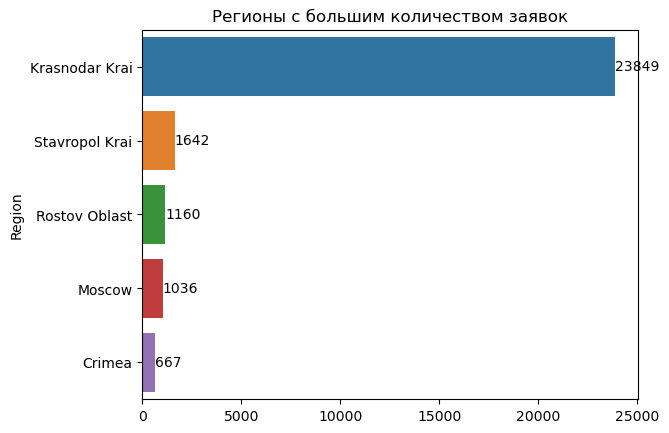

In [6]:
names = data.index
values = data.values

limit = 5
limited_names = names[:limit]
limited_values = values[:limit]
ax=sns.barplot(y=limited_names, x=limited_values)
plt.title('Регионы с большим количеством заявок')
ax.bar_label(ax.containers[0]);

In [8]:
df['Bounce Rate']=df['Bounce Rate'].replace('-', 0)
bounce_rate_avg = df['Bounce Rate'].mean()*100

print("Средний процент отказов: ", round(bounce_rate_avg,2))

Средний процент отказов:  0.23


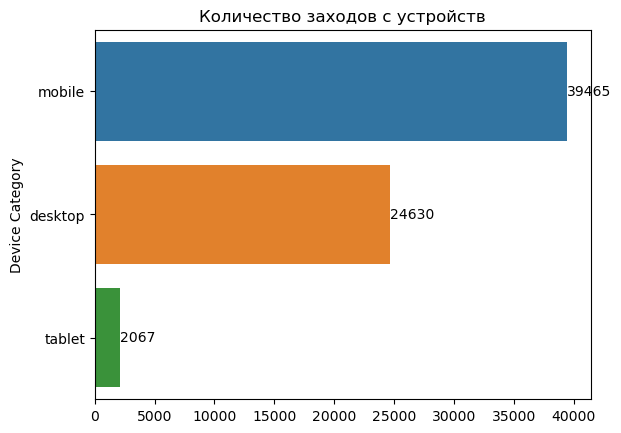

In [ ]:
devices = df.groupby('Device Category').agg('Source').count().sort_values(ascending = False)

names = devices.index
values = devices.values
ax=sns.barplot(y=names, x=values)
plt.title('Количество заходов с устройств')
ax.bar_label(ax.containers[0]);